In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Sequential 按顺序构成的模型
from tensorflow.keras.models import Sequential
# Dense全连接层
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import SGD

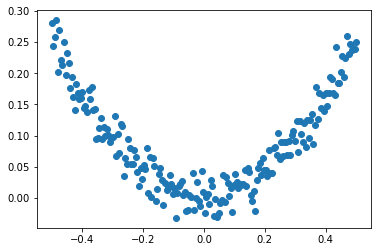

In [2]:
#使用numpy生成200个随机点
x_data = np.linspace(-0.5,0.5,200)
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

#显示随机点
plt.scatter(x_data,y_data)
plt.show()

cost: 0.045577410608530045
cost: 0.004638661630451679
cost: 0.0014734534779563546
cost: 0.0007605294813401997
cost: 0.0004508967977017164
cost: 0.0005817191558890045
cost: 0.0004500149516388774
W [[ 0.5249291  -0.26392755  0.4057721  -1.0296085  -0.03728803 -0.18826063
  -0.95234597  0.0416071  -1.5123475   0.4387741 ]] b [-0.04421912  0.07851334 -0.00318882  0.37178606 -0.13963105  0.20368955
  0.31150195  0.3254558  -0.63318044  0.00326555]


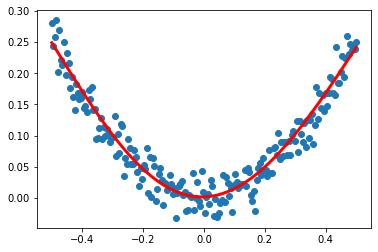

In [6]:
#构建一个顺序模型
model = Sequential()
#在模型中添加一个全连接层
#1-10-1
model.add(Dense(units=10,input_dim=1))
model.add(Activation('tanh'))
model.add(Dense(units=1))
model.add(Activation('tanh'))
#定义优化算法
sgd = SGD(lr=0.3)
#sgd:Stochastic gradient descent,随机梯度下降法
#mes:Mean Squared Error，均方误差
model.compile(optimizer=sgd,loss='mse')

#训练3001个批次
for step in range(3001):
    #每训练一个批次
    cost = model.train_on_batch(x_data,y_data)
    #每500个batch打印一次cost值
    if step % 500 == 0:
        print('cost:',cost)
        
#打印权值和偏置值
W,b = model.layers[0].get_weights()
print('W',W,'b',b)

#x_data输入网络中，得到预测值y_pred
y_pred = model.predict(x_data)

#显示随机点
plt.scatter(x_data,y_data)
#显示预测结果
plt.plot(x_data,y_pred,'r',lw=3)
plt.show()